In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [7]:
df = pd.read_csv('amazon_reviews_alexa.tsv', sep = '\t')

In [8]:
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [10]:
# Let us have a look at the percentage of each rating
print('5 Star Rating Percentage is {0} %'.format((2286/3150)*100))
print('4 Star Rating Percentage is {0} %'.format((455/3150)*100))
print('3 Star Rating Percentage is {0} %'.format((152/3150)*100))
print('2 Star Rating Percentage is {0} %'.format((96/3150)*100))
print('1 Star Rating Percentage is {0} %'.format((161/3150)*100))
#Majority of the reviews are 5 star indicating more positive reviews

5 Star Rating Percentage is 72.57142857142857 %
4 Star Rating Percentage is 14.444444444444443 %
3 Star Rating Percentage is 4.825396825396826 %
2 Star Rating Percentage is 3.0476190476190474 %
1 Star Rating Percentage is 5.111111111111112 %


In [15]:
df['length_of_review'] = df['verified_reviews'].apply(len)

In [16]:
df.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

   length_of_review  
0                13  
1                 9  
2               195  
3               172  
4                 5

In [17]:
import cufflinks as cf
cf.go_offline()

In [19]:
df.iplot(kind='histogram',x='rating',y='length_of_review')

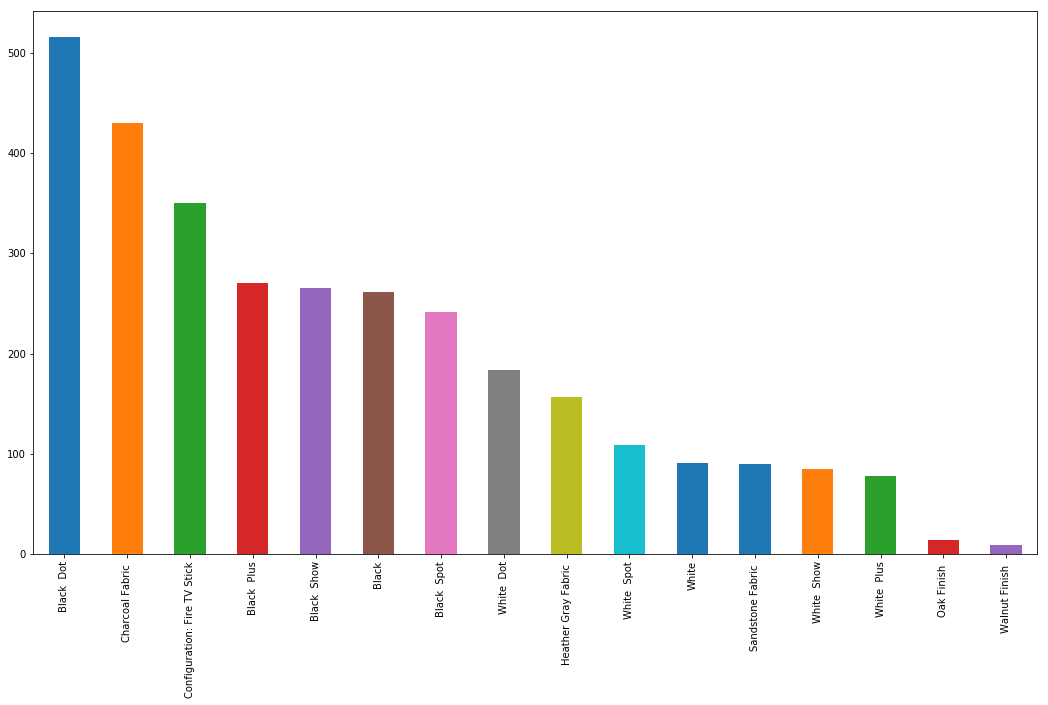

In [22]:
plt.figure(figsize= (18,10))
df.variation.value_counts().plot(kind='bar');

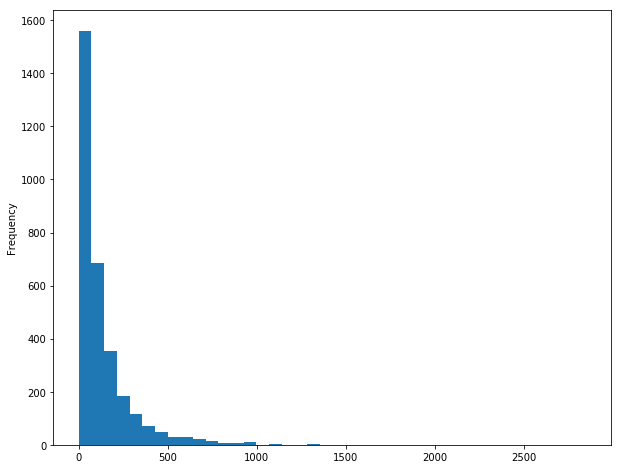

In [33]:
plt.figure(figsize=(10,8))
df['length_of_review'].plot(bins=40, kind='hist')

In [24]:
df.loc[(df.verified_reviews == ' '),].head()

rating       date             variation verified_reviews  feedback  \
85        5  30-Jul-18  Heather Gray Fabric                           1   
183       3  29-Jul-18  Heather Gray Fabric                           1   
219       5  29-Jul-18     Sandstone Fabric                           1   
374       1  26-Jul-18                 Black                          0   
406       1  16-Jul-18                 White                          0   

     length_of_review  
85                  1  
183                 1  
219                 1  
374                 1  
406                 1

In [26]:
df.groupby('rating').describe()

feedback                                    length_of_review  \
          count mean  std  min  25%  50%  75%  max            count   
rating                                                                
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0            161.0   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0             96.0   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0            152.0   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0            455.0   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0           2286.0   

                                                                   
              mean         std  min    25%    50%     75%     max  
rating                                                             
1       195.000000  212.371226  1.0  36.00  120.0  284.00  1124.0  
2       249.187500  269.595303  1.0  78.75  163.0  309.25  1686.0  
3       207.296053  272.194706  1.0  54.00  130.0  284.00  1954.0  
4       178.520879  215.927849  1.0  34.00   99.0  241.00  1360.0  
5       108.444007  152.116387  1.0  26.00   64.0  135.00  2851.0

In [36]:
df.length_of_review.describe()
#largest review contains 2851 characters

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length_of_review, dtype: float64

In [37]:
df[df['length_of_review'] == 2851]['verified_reviews'].iloc[0]
# largest review

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [38]:
df[df['length_of_review'] == 1]['verified_reviews'].iloc[0]
#smallest review

'😍'

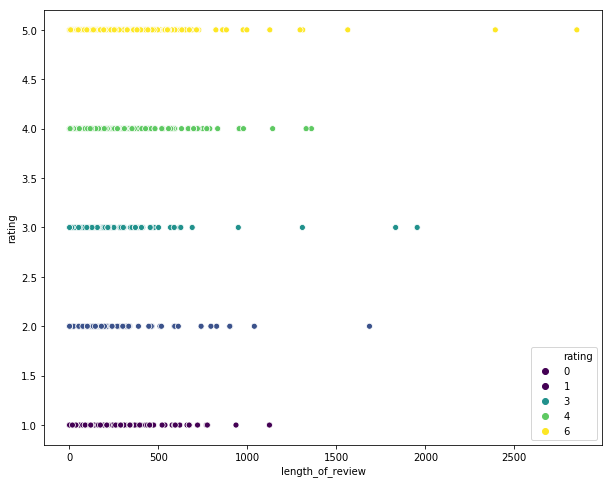

In [40]:
plt.figure(figsize= (10,8))
sb.scatterplot(x='length_of_review',y='rating',data=df,hue='rating',palette='viridis');
#we must remove the neutral ratings since we understand that people who like the product gave a 5 star rating and those 
#who did not gave something below 3 stars

In [42]:
#number of reviews below 3 stars, we consider them as negative_reviews
negative_reviews = df.loc[(df.rating < 3),]
negative_reviews.head()

rating       date             variation  \
46        2  30-Jul-18      Charcoal Fabric    
111       2  30-Jul-18      Charcoal Fabric    
141       1  30-Jul-18      Charcoal Fabric    
162       1  30-Jul-18     Sandstone Fabric    
176       2  30-Jul-18  Heather Gray Fabric    

                                      verified_reviews  feedback  \
46   It's like Siri, in fact, Siri answers more acc...         0   
111  Sound is terrible if u want good music too get...         0   
141                                 Not much features.         0   
162  Stopped working after 2 weeks ,didn't follow c...         0   
176                               Sad joke. Worthless.         0   

     length_of_review  
46                163  
111                53  
141                18  
162                87  
176                20

In [45]:
# we just have to get the most used words by people who gave negative reviews of the product
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
below_counts = cv.fit_transform(negative_reviews['verified_reviews'])
print(below_counts.shape)
print(cv.get_feature_names())

(257, 1379)
['000', '07', '10', '100', '12', '129', '15', '18', '19', '1st', '20', '200', '2017', '229', '23', '24', '25', '30', '30pm', '34', '39', '3rd', '3x', '40', '48', '4th', '600', '888', '99', 'a1', 'abc', 'ability', 'able', 'absolutely', 'accent', 'acceptable', 'access', 'accesss', 'accomplished', 'according', 'account', 'accounts', 'accurately', 'acknowledge', 'act', 'acting', 'action', 'activated', 'activates', 'actively', 'actually', 'ad', 'adapter', 'add', 'adding', 'additionally', 'adjust', 'advance', 'advanced', 'advertised', 'advertisement', 'advertising', 'advise', 'af', 'afraid', 'ago', 'ai', 'alarm', 'alarms', 'alerts', 'alexa', 'alexas', 'alexi', 'allow', 'amazon', 'amazons', 'americans', 'annoying', 'answer', 'answering', 'answers', 'app', 'apparently', 'appears', 'apple', 'application', 'approaching', 'approximately', 'apps', 'area', 'aren', 'arises', 'arrived', 'articles', 'asap', 'ask', 'asked', 'asking', 'asleep', 'assist', 'assistance', 'assistant', 'assumed',

In [46]:
#let us have a look ar frequency of these words
sum_below_1 = below_counts.sum(axis=0)
below_words_freq1 = [(word, sum_below_1[0, idx]) for word, idx in cv.vocabulary_.items()]
below_words_freq1 =sorted(below_words_freq1, key = lambda x: x[1], reverse=True)
below_freq_df1 = pd.DataFrame(below_words_freq1, columns=['word', 'freq'])
below_freq2 = below_words_freq1[8:]
below_freq2


[('product', 42),
 ('dot', 40),
 ('time', 35),
 ('doesn', 33),
 ('use', 33),
 ('music', 32),
 ('screen', 31),
 ('does', 30),
 ('sound', 28),
 ('really', 26),
 ('speaker', 25),
 ('play', 25),
 ('buy', 25),
 ('don', 24),
 ('need', 24),
 ('working', 24),
 ('thing', 24),
 ('try', 24),
 ('bought', 24),
 ('didn', 23),
 ('works', 23),
 ('devices', 23),
 ('hub', 23),
 ('prime', 20),
 ('things', 20),
 ('set', 20),
 ('refurbished', 20),
 ('want', 19),
 ('day', 18),
 ('got', 18),
 ('great', 18),
 ('turn', 18),
 ('disappointed', 17),
 ('money', 17),
 ('home', 17),
 ('know', 17),
 ('better', 17),
 ('phone', 16),
 ('good', 15),
 ('app', 15),
 ('plus', 15),
 ('bulb', 15),
 ('sure', 14),
 ('make', 14),
 ('quality', 14),
 ('wanted', 14),
 ('ask', 14),
 ('return', 13),
 ('smart', 13),
 ('item', 13),
 ('months', 13),
 ('connect', 13),
 ('did', 13),
 ('worked', 13),
 ('light', 13),
 ('times', 13),
 ('half', 13),
 ('way', 13),
 ('stopped', 12),
 ('setting', 12),
 ('google', 12),
 ('fine', 12),
 ('clock', 1

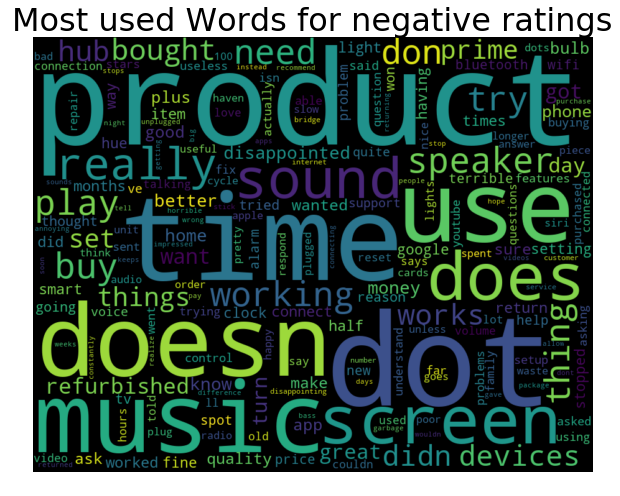

In [53]:
# A wordcloud visualization for most used words of negative reviews
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',width=900, height=700).generate_from_frequencies(dict(below_freq2))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most used Words for negative ratings", fontsize=32);

In [49]:
#Similarly let us grab the most used words for positive reviews i.e. reviews with rating more than 3 stars
positive_reviews = df.loc[(df.rating > 3),]
positive_reviews.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

   length_of_review  
0                13  
1                 9  
2               195  
3               172  
4                 5

In [50]:
#most used words for positive reviews
cv = CountVectorizer(stop_words='english')
above_counts = cv.fit_transform(positive_reviews['verified_reviews'])
print(above_counts.shape)
print(cv.get_feature_names())

(2741, 3202)
['00', '10', '100', '100x', '11', '1100sf', '12am', '15', '150', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '2000', '24', '29', '2nd', '2package', '30', '300', '34', '360', '3rd', '3xs', '45', '4am', '4ghz', '4k', '50', '54', '5ghz', '5th', '62', '672', '6th', '70', '75', '80', '80s', '81', '83', '85', '88', '8gb', '90', '91', '911', '99', '_specifically_', 'a19', 'abd', 'abilities', 'ability', 'able', 'abode', 'absolutely', 'absolutly', 'ac', 'accent', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accidentally', 'accomplish', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accustom', 'acoustical', 'act', 'actions', 'activate', 'activated', 'activating', 'activation', 'activities', 'acts', 'actually', 'ad', 'adapted', 'adapter', 'adapting', 'add', 'added', 'addict', 'addicted', 'addicts', 'adding', 'addition', 'additional', 'addons', 'addressed', 'addresses', 'adds', 'adept', 'adequate', 'adjacent', 'adju

In [51]:
#let us have a look ar frequency of these words
sum_above_1 = above_counts.sum(axis=0)
above_words_freq1 = [(word, sum_above_1[0, idx]) for word, idx in cv.vocabulary_.items()]
above_words_freq1 =sorted(above_words_freq1, key = lambda x: x[1], reverse=True)
above_freq_df1 = pd.DataFrame(above_words_freq1, columns=['word', 'freq'])
above_freq2 = above_words_freq1[8:]
above_freq2


[('easy', 333),
 ('sound', 285),
 ('set', 274),
 ('just', 270),
 ('good', 241),
 ('dot', 218),
 ('product', 204),
 ('home', 191),
 ('speaker', 186),
 ('amazon', 175),
 ('play', 172),
 ('smart', 167),
 ('new', 163),
 ('really', 156),
 ('bought', 152),
 ('fun', 150),
 ('time', 146),
 ('device', 142),
 ('prime', 141),
 ('34', 141),
 ('far', 136),
 ('better', 136),
 ('day', 134),
 ('quality', 126),
 ('things', 120),
 ('room', 117),
 ('having', 114),
 ('learning', 112),
 ('don', 111),
 ('got', 110),
 ('house', 109),
 ('does', 106),
 ('tv', 106),
 ('plus', 105),
 ('little', 104),
 ('thing', 103),
 ('devices', 98),
 ('weather', 97),
 ('work', 95),
 ('ask', 92),
 ('able', 91),
 ('nice', 88),
 ('lights', 87),
 ('alarm', 85),
 ('spot', 85),
 ('using', 84),
 ('amazing', 84),
 ('used', 84),
 ('voice', 83),
 ('listen', 79),
 ('clock', 79),
 ('need', 79),
 ('video', 79),
 ('getting', 76),
 ('best', 76),
 ('buy', 76),
 ('purchase', 75),
 ('screen', 75),
 ('want', 74),
 ('perfect', 74),
 ('awesome', 7

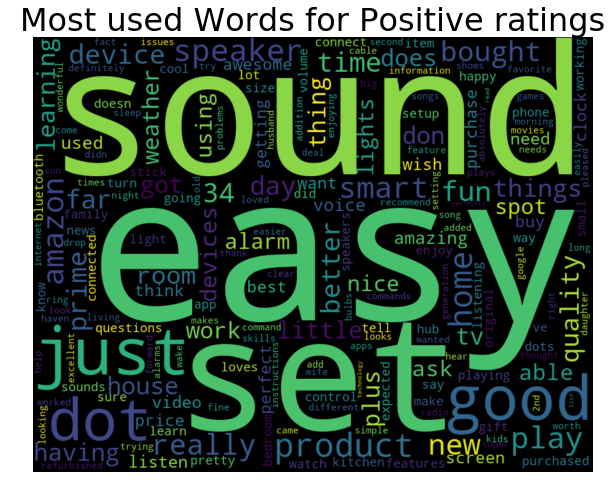

In [54]:
# A wordcloud visualization for most used words of positive reviews
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',width=900, height=700).generate_from_frequencies(dict(above_freq2))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Most used Words for Positive ratings", fontsize=32);

In [57]:
empty_reviews = df.loc[(df.verified_reviews == " "),'feedback'].value_counts()

In [58]:
empty_reviews

1    60
0    19
Name: feedback, dtype: int64

In [65]:
df['verified_reviews'].value_counts()

love it echo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 81
Love it!                                                                                                                                                                                                                                                                                                                                

In [67]:
# let us fill those empty reviews with the most occuring review which is 'love it!'
df['verified_reviews'] = np.where((df.length_of_review == 1),"Love it!",df.verified_reviews)

In [68]:
#no more missing values
df.loc[(df.verified_reviews == " "),]

Empty DataFrame
Columns: [rating, date, variation, verified_reviews, feedback, length_of_review]
Index: []

In [69]:
# let's further clean the data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [87]:
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=df.iloc[:,4].values

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [90]:
pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 16  38]
 [  1 575]]
              precision    recall  f1-score   support

           0       0.94      0.30      0.45        54
           1       0.94      1.00      0.97       576

   micro avg       0.94      0.94      0.94       630
   macro avg       0.94      0.65      0.71       630
weighted avg       0.94      0.94      0.92       630

